# 2. 출생아 수 및 합계출산율

In [6]:
import pandas as pd
file_name = 'babydata.xlsx'
df = pd.read_excel(file_name,skiprows=2,nrows=2,index_col=0)
df

C:\Users\songkyu\anaconda3\envs\ITConsulting\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808


In [7]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [9]:
df.index.values # 공백이 unicode로 포함됨

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [14]:
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'},inplace=True)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808


In [15]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [16]:
df.loc['출생아 수']

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
Name: 출생아 수, dtype: float64

In [17]:
df.iloc[0]

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
Name: 출생아 수, dtype: float64

In [21]:
df = df.T # row와 column의 위치를 바꾼다.
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837
2021,260.6,0.808


In [22]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['axes.unicode_minus']=False

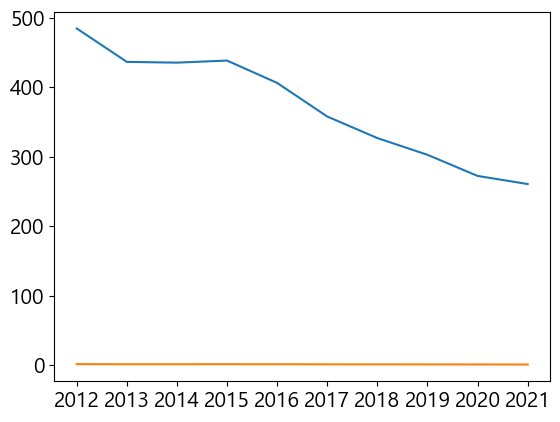

In [24]:
plt.plot(df.index,df['출생아 수'])
plt.plot(df.index,df['합계 출산율'])
# >> x축은 공유해도 상관없으나, y축의 범위를 서로 구분해야 함.

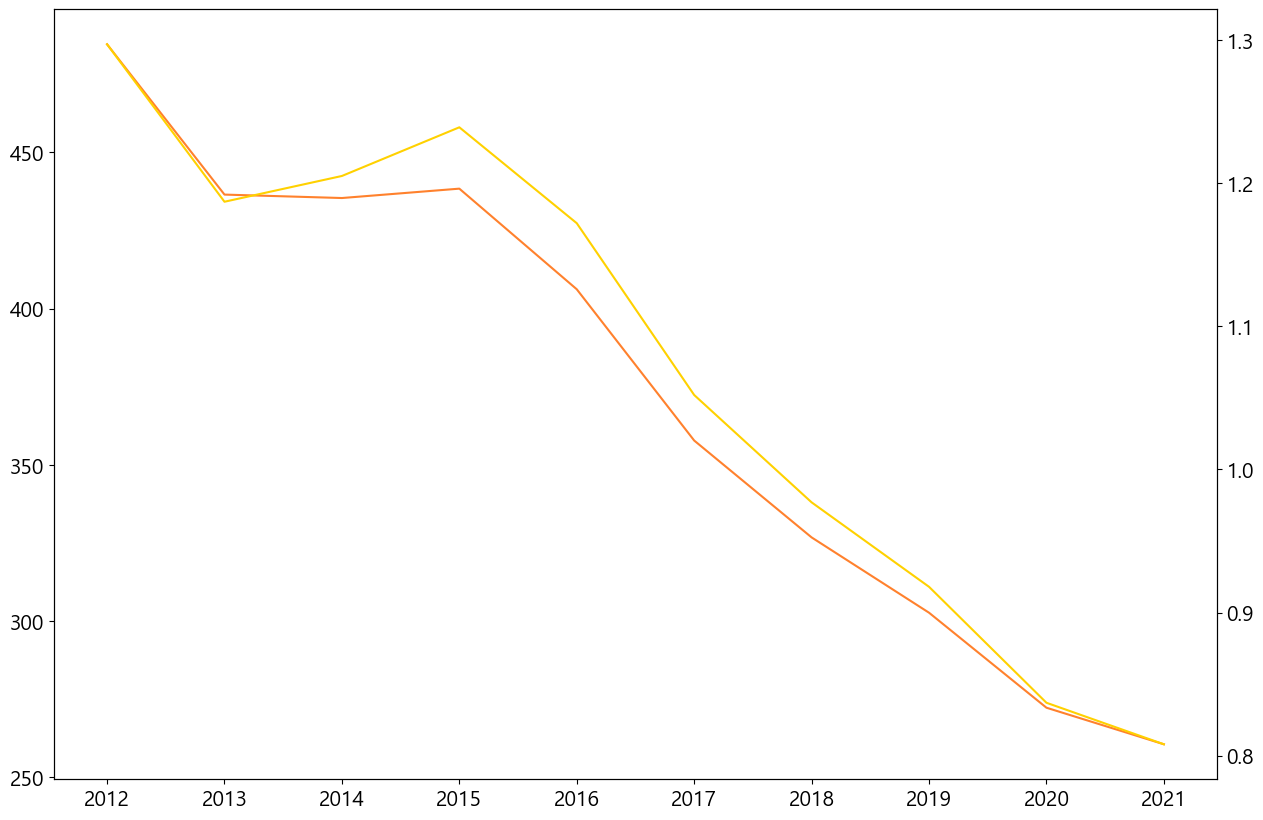

In [26]:
fig,ax1 = plt.subplots(figsize=(15,10)) # row,col을 지정하지 않으면 1개의 그래프만 그린다.
ax1.plot(df.index,df['출생아 수'],color='#ff812d')

ax2 = ax1.twinx() # ax1그래프와 x축을 '공유'하는 쌍둥이 axis를 만든다.
ax2.plot(df.index,df['합계 출산율'],color='#ffd100')

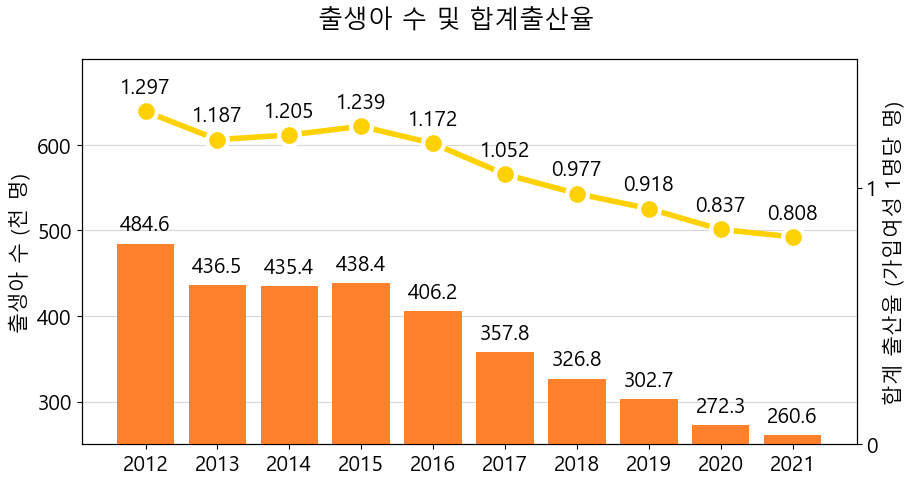

In [64]:
fig,ax1 = plt.subplots(figsize=(10,5)) # row,col을 지정하지 않으면 1개의 그래프만 그린다.
fig.suptitle('출생아 수 및 합계출산율')

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250,700)
ax1.set_yticks([300,400,500,600])
ax1.grid(axis='y',alpha=0.5, zorder=0) # zorder로 grid를 그래프 뒤로 숨긴다.
bar=ax1.bar(df.index,df['출생아 수'],color='#ff812d',zorder=3)
for index, value in enumerate(df['출생아 수']): # 막대그래프에 데이터 표시하기
    ax1.text(index,value + 15, value, ha='center') 

ax2 = ax1.twinx() # ax1그래프와 x축을 '공유'하는 쌍둥이 axis를 만든다.
ax2.set_ylabel('합계 출산율 (가입여성 1명당 명)')
ax2.set_ylim(0,1.5)
ax2.set_yticks([0,1])
ax2.plot(df.index,df['합계 출산율'],color='#ffd100',
        marker='o',markersize=15,linewidth=4,mec='w',mew=3,zorder=3)
for index,value in enumerate(df['합계 출산율']):
    ax2.text(index,value + 0.07, value, ha='center')

plt.savefig('출산율_및_합계_출산율.png')